In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from matplotlib.axes._axes import _log as mpl_axes_logger
from matplotlib.colors import ListedColormap
from mpl_toolkits import mplot3d
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [2]:
mpl_axes_logger.setLevel('ERROR')

In [3]:
zero_one_colormap = ListedColormap(('red','blue'))

### Plot Decision Boundary

In [18]:
def plot_decision_boundary(X,y,clf):
    X, y = X, y
    #The purpose of meshgrid is to create a rectangular grid out of an array of x values and an array of y values
    X1, X2 = np.meshgrid(np.arange(start = X[:,0].min()-1,
                                   stop = X[:,0].max()+1,
                                   step = 0.01),
                         np.arange(start = X[:,1].min()-1,
                                   stop = X[:,1].max()+1,
                                   step = 0.01))
    #Ravel = Change a 2-dimensional array or a multi-dimensional array into a contiguous flattened array
    plt.contourf(X1,X2, clf.predict(np.array([X1.ravel(), 
                                             X2.ravel()]).T).reshape(X1.shape),
                alpha = 0.75, cmap = zero_one_colormap)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y)):
        plt.scatter(X[y==j,0],X[y==j,1], c=(zero_one_colormap)(i), label = j)
    
    plt.title('SVM decision boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    return plt.show()

### Plot 3D

In [6]:
def plot_3d(X,y):
    r = np.exp(-(X**2).sum(1))
    ax = plt.subplot(projection = '3d')
    ax.scatter3D(X[:,0], X[:,1],r,c=y,s=100, cmap = zero_one_colormap)
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('y')
    return ax

### Reading Data

In [7]:
df = pd.read_excel("SVM_Data.xlsx")
df.head()

,X1,X2,Y
0,-0.364924,0.230728,1
1,-0.293515,-0.974130,0
2,0.470622,0.966409,0
3,-0.549030,0.869911,0
4,-1.072329,-0.195141,0


In [8]:
X = df.loc[:,['X1','X2']].values
y = df.loc[:,'Y'].values

In [9]:
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state=0)

In [10]:
classifier = SVC(kernel = "linear")
classifier.fit(X_train,y_train.ravel())
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.46153846153846156

In [11]:
confusion_matrix(y_test, y_pred)

array([[0, 7],
       [0, 6]], dtype=int64)

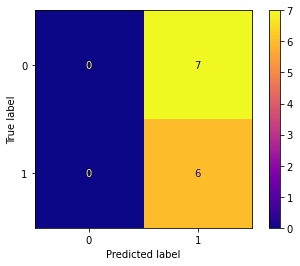

In [12]:
plot_confusion_matrix(classifier, X_test, y_test, cmap = "plasma")

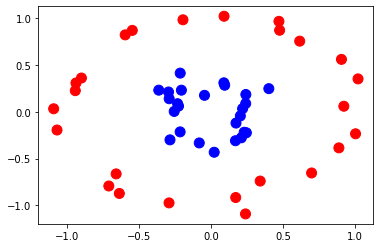

In [14]:
plt.scatter(X[:,0], X[:,1], c= y, s = 100, cmap =zero_one_colormap )
plt.show()

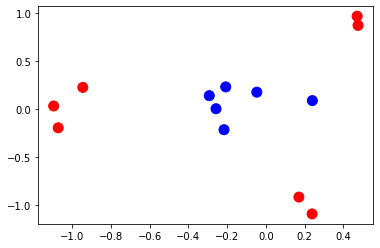

In [15]:
plt.scatter(X_test[:,0], X_test[:,1], c= y_test, s = 100, cmap =zero_one_colormap )
plt.show()

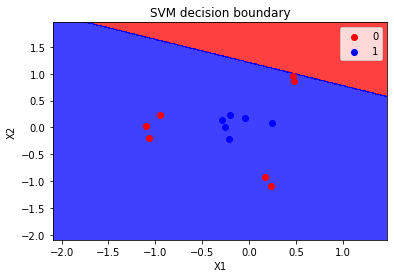

In [19]:
plot_decision_boundary(X_test, y_test, classifier)

<Axes3DSubplot:xlabel='X1', ylabel='X2'>

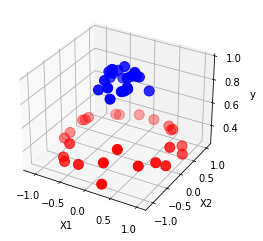

In [20]:
#Checking the data in 3D
plot_3d(X,y)

Convert from a non-linear data set in a lower dimension to a linearly seperable data set in a higher dimension

### Non linear SVM Classifier using "RBF" kernel trick

In [22]:
classifier = SVC(kernel = "rbf")
classifier.fit(X_train,y_train.ravel())
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

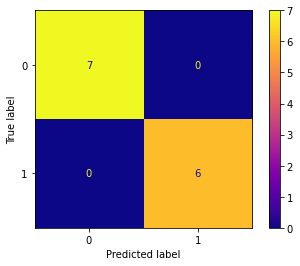

In [23]:
plot_confusion_matrix(classifier, X_test, y_test, cmap = "plasma")

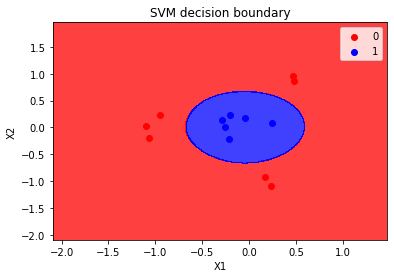

In [24]:
plot_decision_boundary(X_test, y_test, classifier)